<a href="https://colab.research.google.com/github/davidalejandromiranda/laboratorios-fisica/blob/master/Pendulo_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Comodín 1: análisis del péndulo simple, un experimento en casa</h1>
<div align="right">Paula Daniela Cárdenas León, 2181289<br>Gessika Gónzalez Santos, 2181565<br>Joan Sebastián Parra Atencio, 2182825<br>Grupo H2a, 2020</div>

## Fundamentos físicos:

Un péndulo simple se define como una partícula puntual de masa $m$ suspendido mediante un hilo inextensible de longitud $L$ y fijo respesto a un punto de pivote $P$. Cuando la partícula se desplaza a una amplitud inicial $\theta_0$ (ángulo que forma el hilo con la vertical) y se suelta, el péndulo exhibirá un movimiento oscilatorio y periódico. 

Suponga el siguiente sistema físico: 

![pendulo3.png](attachment:pendulo3.png)

donde se ha asumido fricción nula. Aplicando segunda ley de Newton para sistemas rotacionales, la ecuación de movimiento está dada por 

\begin{equation}
\sum_{i} \tau_i = I\alpha,
\end{equation}
donde se considera la sumatoria de todos los torques que afectan el sistema y adicional $I$ es el momento de inercia y $\alpha$ es la aceleración angular. Considerando una fuerza de rozamiento $F_r=-\mu v_t$, donde $v_t=L\frac{d\theta}{dt}$ es la velocidad tangencial instantanea de la partícula, la anterior ecuación nos lleva a
\begin{equation}
-mgL \sin\theta -\mu L^2 \frac{d\theta}{dt}= mL^2\frac{d^2\theta}{dt^2},
\end{equation}
la cual lleva la ecuación diferencial 
\begin{equation}
\frac{d^2\theta}{dt^2}+2\gamma\frac{d\theta}{dt}+\omega_0 ^2\sin\theta=0,
\end{equation}
donde $\omega_0=\sqrt{\frac{g}{L}}$ es la frecuencia natural de oscilación y $\gamma=\frac{\mu}{2m}$ es la constante de amortiguamento del sistema.
### Caso 1: oscilaciones libres - pequeñas amplitudes



Debido a que se consideran pequeñas amplitudes ($\theta_0\approx 0$), resulta válida la aproximación $\sin\theta\approx \theta$, en tanto que la ecuación diferencial queda de la forma 
\begin{equation}
\frac{d^2\theta}{dt^2}+\omega_0 ^2\theta=0,
\end{equation}

que corresponde a la ecuación diferencial de un oscilador armónico simple con solución

\begin{equation}
\theta(t)=\theta_0 \cos(\omega t+\phi).
\end{equation}

Adicionalmente, el periodo está dado por $T=\frac{1}{2\pi}\sqrt{\frac{L}{g}}$.

### Caso 2: oscilaciones amortiguadas - pequeñas amplitudes

Nuevamente se considera la aproximación a ángulos pequeños $\sin\theta\approx \theta$ llevando a la ecuación diferencial  

\begin{equation}
\frac{d^2\theta}{dt^2}+2\gamma\frac{d\theta}{dt}+\omega_0 ^2\theta=0,
\end{equation}

la cual corresponde a la ecuación diferencial para un oscilador amortiguado y cuya solución está dada por 

\begin{equation}
\theta=\theta_0 e^{-\gamma t}\cos(\Omega t+\phi),
\end{equation}

donde la frecuencia está dada por $\Omega=\sqrt{\omega_0^2 - \gamma ^2}$. Naturalmente la amplitud está modulada por la función envolvente $A=\theta_0 e^{-\gamma t}$. Por otro lado, los casos de amortiguamiento están dados por 
* $\omega_0^2>\gamma^2$ (subamortiguado)
* $\omega_0^2=\gamma^2$ (críticamente amortiguado)
* $\omega_0^2<\gamma^2$ (sobreamortiguado)

### Caso 3: grandes oscilaciones

Una vez se elimina la aproximación a ángulos pequeños la solución para la ecuación diferencial en oscilaciones libres se encuentra en términos de funciones especiales (integrales elípticas de primera especie) y para el caso con fricción no hay solución analítica.  

## Análisis experimental:
Datos

In [1]:
g=9.8 # gravedad en [m/s²]
L=0.9 # Longitud del hilo en [m]
m=0.060 # masa colgante en [kg]

In [2]:
# Aquí se importan las librerías necesarías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Primeros cálculos 
omenat=math.sqrt(g/L)
gamma=0
Omega=math.sqrt(omenat**2 - gamma**2)

#### Análisis para pequeñas oscilaciones

In [57]:
# Comando para importar los datos desde excel y manejarlos como un dataframe
# Descargar datos del repositorio
import pandas as pd
data_links = {
    'caso1':'https://github.com/davidalejandromiranda/laboratorios-fisica/blob/master/f3/i2_Pendulo_Simple/Caso2.csv'
}

data1=pd.read_csv(data_links['caso2'])
data1

ParserError: Error tokenizing data. C error: Expected 1 fields in line 49, saw 2


In [5]:
plt.plot(data1.t,data1.angulo) # Aquí se grafican los datos de ángulo vs tiempo importados anteriormente
plt.title('Curva experimental')
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

NameError: name 'data1' is not defined

Evidentemente, corresponde al caso subamortiguado. No obstante, alrededor de $t=25$ s el comportamiento empieza a presentar irregularidades en las oscilaciones. Por tal motivo se usarán los datos hasta $20$ s pues se consideran como buenas oscilaciones en el sentido en que presentan un decrecimiento homogéneo y acorde a la teoría. 

In [6]:
# Aquí se corta el dataframe hasta t=20 s y se introduce un nuevo dataframe más pequeño
dc1=data1.drop(range(608,1527), axis=0)
dc1

NameError: name 'data1' is not defined

In [7]:
plt.plot(dc1.t,dc1.angulo)
plt.title('Curva experimental')
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

NameError: name 'dc1' is not defined

#### Determinando el coeficiente de atenuación: 

Seleccionamos los datos de las amplitudes máximas positivas y el tiempo en que se obtienen

In [8]:
amp=np.array([0.165821, 0.158853, 0.150577, 0.144049, 0.134629, 0.129458, 0.123153, 0.112110, 0.105554, 0.097146])
time=np.array([0.0, 2.08, 4.06, 6.10, 8.08, 10.10, 12.11, 14.09, 16.07, 18.12])


Linealización de datos

Se linealiza la ecuación que describe el cambio en la amplitud de la oscilación mediante el siguiente cambio de variable:

\begin{equation}
y=-ln\left|\frac{\theta(t)}{\theta_0}\right|,
\end{equation}

\begin{equation}
x=t
\end{equation}

la ecuación de solución será dada por 

\begin{equation}
y=\gamma x
\end{equation}

In [9]:
y = -1*np.log(amp/amp[0]) # Se realizan los cambios de variables
x = time

p = np.polyfit(x, y, 1) # Interpolación
gamma = p[0] # 1/s
p[1] = 0 # garantiza el cruce por cero

correlation_matrix = np.corrcoef(y, np.polyval(p, x))
R = correlation_matrix[0, 1]**2

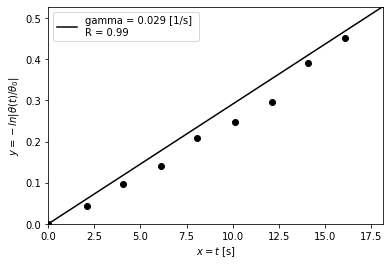

In [10]:
# Aquí se realizan las definiciones de las cantidades a graficar y las gráficas respectivas 
# de la regresión lineal
label = 'gamma = %0.3f [1/s] \nR = %0.2f' % (gamma, R)

x_model2 = np.linspace(min(time), max(time), 10)
y_model2 = np.polyval(p, x_model2)

plt.plot(x,y, 'ok')
plt.plot(x_model2, y_model2, 'k', label=label)
#plt.plot(p,x)
plt.xlabel(r'$x = t$ [s]')
_ = plt.ylabel(r'$y = - ln\left|\theta(t) / \theta_0\right| $')
plt.legend()
_ = plt.axis([0, max(x_model2), min(y_model2), max(y_model2)])
plt.show()

Estimación de $\Omega$:
* Forma 1 - relación con el periodo de las oscilaciones

In [11]:
# Se hace la diferencia entre t[i+1]-t[i] para calcular los periodos y la función mean
# devuelve el promedio de todos estos periodos
T=np.mean(np.diff(time))
Omega1=2*np.pi/T
print(Omega1)

3.120787404228271


* Forma 2 - mediante la definición $\Omega=\sqrt{\omega_0^2-\gamma^2}$

In [12]:
Omega2=math.sqrt(omenat**2 - gamma**2)
print(Omega2)

3.2997028733884153


#### Curva teórica con los valores obtenidos:

In [13]:
# Aquí se calculan las curvas teóricas con los valores de gamma y Omega obtenidos
Omega=Omega1
in_array=np.linspace(0,20,1000)

out_array1=[]
for i in range(len(in_array)): 
    out_array1.append(amp[0]*math.e**(-gamma*in_array[i])*math.cos(Omega*in_array[i]))
    i += 1
    
Omega=Omega2
out_array2=[]
for i in range(len(in_array)): 
    out_array2.append(amp[0]*math.e**(-gamma*in_array[i])*math.cos(Omega*in_array[i]))
    i += 1

In [14]:
# Aquí se grafican las cuvas teóricas y experimentales simultaneamente
plt.plot(in_array, out_array1, label='Teórica')
plt.plot(dc1.t,dc1.angulo, label='Experimental')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

NameError: name 'dc1' is not defined

In [15]:
plt.plot(in_array, out_array2, label='Teórica')
plt.plot(dc1.t,dc1.angulo, label='Experimental')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

NameError: name 'dc1' is not defined

Evidentemente la deducción de $\Omega$ es mejor por la forma 1 ya que es un método más directo. La forma 2, debido a las incertidumbres y la propagación de errores en los cálculos genera las discrepancias observadas. Por otro lado, las diferencias en los valores de amplitudes negativas se debe a dificultades en la extracción de datos del programa tracker.

#### Oscilaciones $\sim 60^{\circ}$

In [16]:
data2=pd.read_excel(data_links[1])
data2

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\n\n\n\n\n<!D'

In [17]:
plt.plot(data2.t,data2.angulo)
plt.title('Curva experimental')
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

NameError: name 'data2' is not defined

Nuevamente se obtiene un comportamiento subamortiguado, como debe ser. El comportamiento
de la amplitud permite identificar de mejor manera la función exponencial envolvente. Se repite el análisis.

In [18]:
amp2=np.array([0.984665, 0.778860, 0.684093, 0.589707, 0.526436, 0.463230, 0.429422, 0.382955, 0.363350, 0.32617, 0.314316, 0.289121, 0.271771, 0.262217])
time2=np.array([0.06, 2.18, 4.22, 6.27, 8.32, 10.39, 12.37, 14.42, 16.40, 18.44, 20.43, 22.47, 24.45, 26.50])


In [19]:
y2 = -1*np.log(amp2/amp2[0])
x2 = time2

p = np.polyfit(x2, y2, 1)
gamma = p[0] # 1/s
p[1] = 0 # garantiza el cruce por cero

correlation_matrix = np.corrcoef(y2, np.polyval(p, x2))
R = correlation_matrix[0, 1]**2

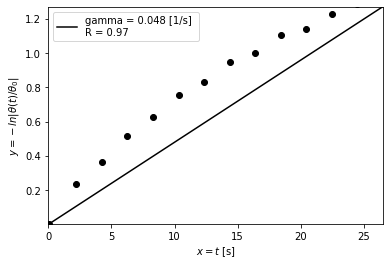

In [20]:
label = 'gamma = %0.3f [1/s] \nR = %0.2f' % (gamma, R)

x2_model2 = np.linspace(min(time2), max(time2), 10)
y2_model2 = np.polyval(p, x2_model2)

plt.plot(x2,y2, 'ok')
plt.plot(x2_model2, y2_model2, 'k', label=label)
#plt.plot(p,x)
plt.xlabel(r'$x = t$ [s]')
_ = plt.ylabel(r'$y = - ln\left|\theta(t) / \theta_0\right| $')
plt.legend()
_ = plt.axis([0, max(x2_model2), min(y2_model2), max(y2_model2)])
plt.show()

Estimación de $\Omega$:
* Forma 1 - relación con el periodo de las oscilaciones

In [21]:
T=np.mean(np.diff(time2))
Omega1=2*np.pi/T
print(Omega1)

3.08931198915789


In [22]:
Omega2=math.sqrt(omenat**2 - gamma**2)
print(Omega2)

3.299483663778772


#### Curva teórica con los valores obtenidos: 

In [23]:
in_array=np.linspace(0,25,1000)

Omega=Omega1
out_array1=[]
for i in range(len(in_array)): 
    out_array1.append(amp2[0]*math.e**(-gamma*in_array[i])*math.cos(Omega*in_array[i]))
    i += 1
    
Omega=Omega2
out_array2=[]
for i in range(len(in_array)): 
    out_array2.append(amp2[0]*math.e**(-gamma*in_array[i])*math.cos(Omega*in_array[i]))
    i += 1

In [24]:
plt.plot(in_array, out_array1, label='Teórica')
plt.plot(data2.t,data2.angulo, label='Experimental')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

NameError: name 'data2' is not defined

In [25]:
plt.plot(in_array, out_array2, label='Teórica')
plt.plot(data2.t,data2.angulo, label='Experimental')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

NameError: name 'data2' is not defined

#### Oscilaciones para ángulos grandes ($\sim 80^{\circ}$):

In [26]:
data3=pd.read_excel(data_links[2])
data3

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\n\n\n\n\n<!D'

In [27]:
plt.plot(data3.t,data3.angulo)
#plt.plot(data2.t,data2.angulo)
plt.title('Curva experimental')
plt.xlabel('t [s]')
plt.ylabel('Ángulo [rad]')
plt.show()

NameError: name 'data3' is not defined

Se seleccionan los tiempos en los que se alcanzan amplitudes máximas positivas, obteniendo:

In [28]:
time3=np.array([0.0, 2.211, 4.257, 6.369, 8.415, 10.461, 12.507, 14.487, 16.500, 18.546, 20.526, 22.572, 24.552, 26.598, 28.644])

In [29]:
T1=np.mean(np.diff(time3))
print(T, T1)

2.033846153846154 2.046


Como se mencionó, la solución para grandes oscilaciones involucra integrales elípticas de primera especie. La solución para el periodo es de la forma 

\begin{equation}
T(\theta)=T_{0}\left[\sum_{n=0}^{\infty}\left(\frac{(2 n) !}{2^{2 n}(n !)^{2}}\right)^{2} \sin ^{2 n}\left(\frac{\theta}{2}\right)\right]= T_{0}\left[1+\left(\frac{1}{2}\right)^{2} \sin ^{2} \frac{\theta}{2}+\left(\frac{1 \cdot 3}{2 \cdot 4}\right)^{2} \sin ^{4} \frac{\theta}{2}+\left(\frac{1 \cdot 3 \cdot 5}{2 \cdot 4 \cdot 6}\right)^{2} \sin ^{6} \frac{\theta}{2}+\ldots\right]
\end{equation}

No obstante, para el ángulo considerado ($1.31 [rad]\approx 75^{\circ}$) basta con una aproximación a primer orden ($n=1$), lo que lleva a obtener

\begin{equation}
T \approx T_{0}\left(1+\frac{1}{4}\sin^2\frac{\theta}{2}\right)
\end{equation}

Basado en esto, el periodo teórico obtenido es

In [30]:
T1teo=T*(1 + 0.25*(math.sin(1.314853/2)**2))
print(T1teo)

2.2237163397511073


Que presenta un error relativo porcentual

In [31]:
Err=100*(T1teo-T1)/T1teo
print(Err,'%')

7.991861937345778 %


### Conclusiones:

* En primer lugar, todos los casos realizados responden a un movimiento oscilatorio amortiguado, esto se debe al movimiento relativo de la masa colgante con el aire circundante. Ya que la fuerza de rozamiento es proporcional a la velocidad tangencial instantanea, es de esperarse que a mayor amplitud inicial, mayor sea la atenuación (más evidente también) ya que la velocidad máxima es dependiente de la amplitud inicial. 

* Para todos los casos el movimiento se atenúa de una forma exponencial modulando la amplitud, tal y como lo predice el modelo teórico. 

* En caso de querer estudiar el caso más aproximado a oscilaciones libres requeriría estudiar un bajo número de oscilaciones con una amplitud pequeña, allí se obtendrá una función sinusoidal y no serán completamente apreciables los efectos de la atenuación exponencial.

* El caso de grandes oscilaciones que se estudió no permitió realizar un análisis completamente concluyente de la aplicación de la solución en series.

* Si bien la extracción de datos en el programa tracker resulta delicado y es fácil introducir errores, los casos analizados son una buena experiencia para verificar el modelo teórico estudiado. 

### Referencias:

* Marion, Jerry B. (1996). Dinámica clásica de las partículas y sistemas. Barcelona: Ed. Reverté.
* David Alejandro Miranda Mercado.  (2020, junio 29). Laboratorio de Física 3, Proyecto 2: Péndulo Simple Amortiguado [Archivo de video]. Recuperado de: https://www.youtube.com/watch?v=-kQheIGBKB0
* David Alejandro Miranda Mercado. (2020, julio 8). Laboratorio de Física 3, Proyecto 2: Péndulo Simple Amortiguado, Análisis de Datos [Archivo de video]. Recuperado de: https://www.youtube.com/watch?v=Khrhk-4LTJ0
